# Read Remote MERRA2 Data File

Read remote MERRA2 data files using the NASA EarthData credentials.

We use here the `urllib` module.

It is assumed that the user has a valid username and password at EarthData:

```
        https://urs.earthdata.nasa.gov
```

It might also be necessary to link GES DISC with your EarthData account:

```
        https://disc.gsfc.nasa.gov/earthdata-login
```

Here are the task we accomplish:

- The remote data file is downloaded
- The local file is read using Xarray into a Xarray DataSet
- We extract the Aerosol Optical Depth (AOD) and carry out analyses and visualizations.
- We compute the daily averaged value of AOD and save it in a file.

#### Authors
Mei Han, Jules Kouatchou, Dana R. Louie, Xiaomei Lu, 
Brian E. Magill, Carlos Ordaz, Xiaohua Pan, Nazma I. Syeda, and Yujie Wang

In [1]:
import urllib.request as urllib
import getpass

In [2]:
earthdata_url = "https://urs.earthdata.nasa.gov"

#### Remote MERRA-2 file information

In [3]:
file_url = "https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXAER.5.12.4/2020/01/"
remote_fname = "MERRA2_400.tavg1_2d_aer_Nx.20200131.nc4.nc4"
local_fname = remote_fname[:-4]

#### Obtain the user's credential in the EarthData website

- Enter your EarthData userid and your password
- Note that your password will not be visible when you type it.

In [4]:
username = input("Provide your EarthData userid: ")
password = getpass.getpass("Provide your EarthData password: ")

Provide your EarthData userid:  jrkouatchou
Provide your EarthData password:  ··········


#### Create an object for redirecting server

In [5]:
redirectHandler = urllib.HTTPRedirectHandler()

#### Create special opener with support for Cookies

In [6]:
cookieProcessor = urllib.HTTPCookieProcessor()

#### Create the password manager and load with the credentials

In [7]:
passwordManager = urllib.HTTPPasswordMgrWithDefaultRealm()
passwordManager.add_password(None, earthdata_url, username, password)
authHandler = urllib.HTTPBasicAuthHandler(passwordManager)

#### Open a connection to the EarthData server

In [8]:
opener = urllib.build_opener(redirectHandler, cookieProcessor, authHandler)
urllib.install_opener(opener)

#### Read the remote file

In [9]:
response = urllib.urlopen(file_url+remote_fname)
data_obj = response.read()

#### Write the content of the remote file in a local netCDF file

In [10]:
with open(local_fname, "wb") as fid:
    fid.write(data_obj)

#### Data Analysis

In [11]:
import xarray as xr
ds = xr.open_dataset(local_fname, engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:    (time: 24, lat: 361, lon: 576)
Coordinates:
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time       (time) datetime64[ns] 2020-01-31T00:30:00 ... 2020-01-31T23:30:00
Data variables: (12/50)
    SSSMASS25  (time, lat, lon) float32 ...
    DUSCATAU   (time, lat, lon) float32 ...
    BCSCATAU   (time, lat, lon) float32 ...
    DUEXTTAU   (time, lat, lon) float32 ...
    BCFLUXU    (time, lat, lon) float32 ...
    OCFLUXV    (time, lat, lon) float32 ...
    ...         ...
    SO2SMASS   (time, lat, lon) float32 ...
    SSANGSTR   (time, lat, lon) float32 ...
    DUEXTT25   (time, lat, lon) float32 ...
    OCFLUXU    (time, lat, lon) float32 ...
    OCSCATAU   (time, lat, lon) float32 ...
    TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/32)
    History:                           Original file generated: Mon Feb 10 20...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_aer_Nx.20200131.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    RangeBeginningDate:                2020-01-31
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2020-01-31
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2021-11-02 00:45:53 GMT Hyrax-1.16.3 h...

In [12]:
ds.time

<xarray.DataArray 'time' (time: 24)>
array(['2020-01-31T00:30:00.000000000', '2020-01-31T01:30:00.000000000',
       '2020-01-31T02:30:00.000000000', '2020-01-31T03:30:00.000000000',
       '2020-01-31T04:30:00.000000000', '2020-01-31T05:30:00.000000000',
       '2020-01-31T06:30:00.000000000', '2020-01-31T07:30:00.000000000',
       '2020-01-31T08:30:00.000000000', '2020-01-31T09:30:00.000000000',
       '2020-01-31T10:30:00.000000000', '2020-01-31T11:30:00.000000000',
       '2020-01-31T12:30:00.000000000', '2020-01-31T13:30:00.000000000',
       '2020-01-31T14:30:00.000000000', '2020-01-31T15:30:00.000000000',
       '2020-01-31T16:30:00.000000000', '2020-01-31T17:30:00.000000000',
       '2020-01-31T18:30:00.000000000', '2020-01-31T19:30:00.000000000',
       '2020-01-31T20:30:00.000000000', '2020-01-31T21:30:00.000000000',
       '2020-01-31T22:30:00.000000000', '2020-01-31T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-31T00:30:00 ... 2020-01-31T23:30:00
Attributes:
    long_name:       time
    time_increment:  10000
    begin_date:      20200131
    begin_time:      3000
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]
    origname:        time
    fullnamepath:    /time

In [13]:
var_name = 'TOTEXTTAU'
ds_TOTEXTTAU = ds[var_name]

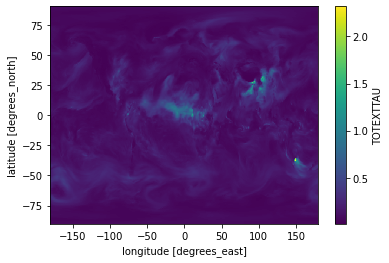

In [14]:
ds_TOTEXTTAU.mean(dim="time").plot(x="lon", y="lat");

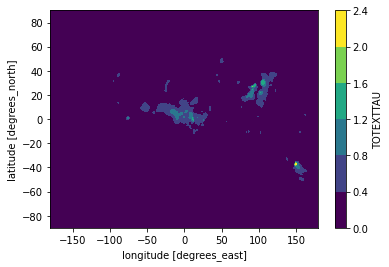

In [15]:
ds_TOTEXTTAU.mean(dim="time").plot.contourf(x="lon", y="lat");

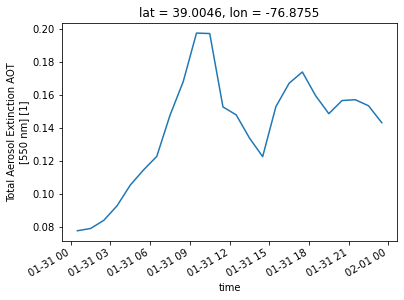

In [16]:
sel_lat = 39.0046
sel_lon = -76.8755
ds_TOTEXTTAU.interp(lat=sel_lat, lon=sel_lon).plot();

In [17]:
cur_date = '20200131'
file_name = ".".join([var_name, cur_date, 'nc4'])
ds_TOTEXTTAU.mean(dim="time").to_netcdf(file_name)